In [1]:
# Check the current virtual-env
# ds is the right one
!conda env list

# conda environments:
#
                         /Users/maximilianstaebler/.platformio/penv
base                     /anaconda3
ansible                  /anaconda3/envs/ansible
ds                    *  /anaconda3/envs/ds
ox                       /anaconda3/envs/ox
python-viz               /anaconda3/envs/python-viz
test                     /anaconda3/envs/test



# City of Duesseldorf

This notebook intends to visualize the speeding incidents within the city of duesseldorf and some more location based visualizations.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import geopandas

pd.options.display.max_rows = 10

In [3]:
# Import the cologne geojson data

duesseldorf = geopandas.read_file('./datasets/cities/duesseldorf.geojson')

In [4]:
duesseldorf.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Garath,13,2015-06-29T11:10:40,2015-06-29T11:10:40,"(POLYGON ((6.878954 51.14485, 6.879022 51.1450..."
1,Hubbelrath,24,2015-06-29T11:10:40,2015-06-29T11:10:40,"(POLYGON ((6.870699 51.243202, 6.870719 51.243..."
2,Vennhausen,47,2015-06-29T11:10:40,2015-06-29T11:10:40,"(POLYGON ((6.839504 51.22059, 6.841703 51.2203..."
3,Carlstadt,5,2015-06-29T11:10:40,2015-06-29T11:10:40,"(POLYGON ((6.763839 51.220919, 6.764745 51.221..."
4,Niederkassel,35,2015-06-29T11:10:40,2015-06-29T11:10:40,"(POLYGON ((6.737774 51.246254, 6.737899 51.246..."


(6.67613025, 6.952444750000001, 51.11296505, 51.363939949999995)

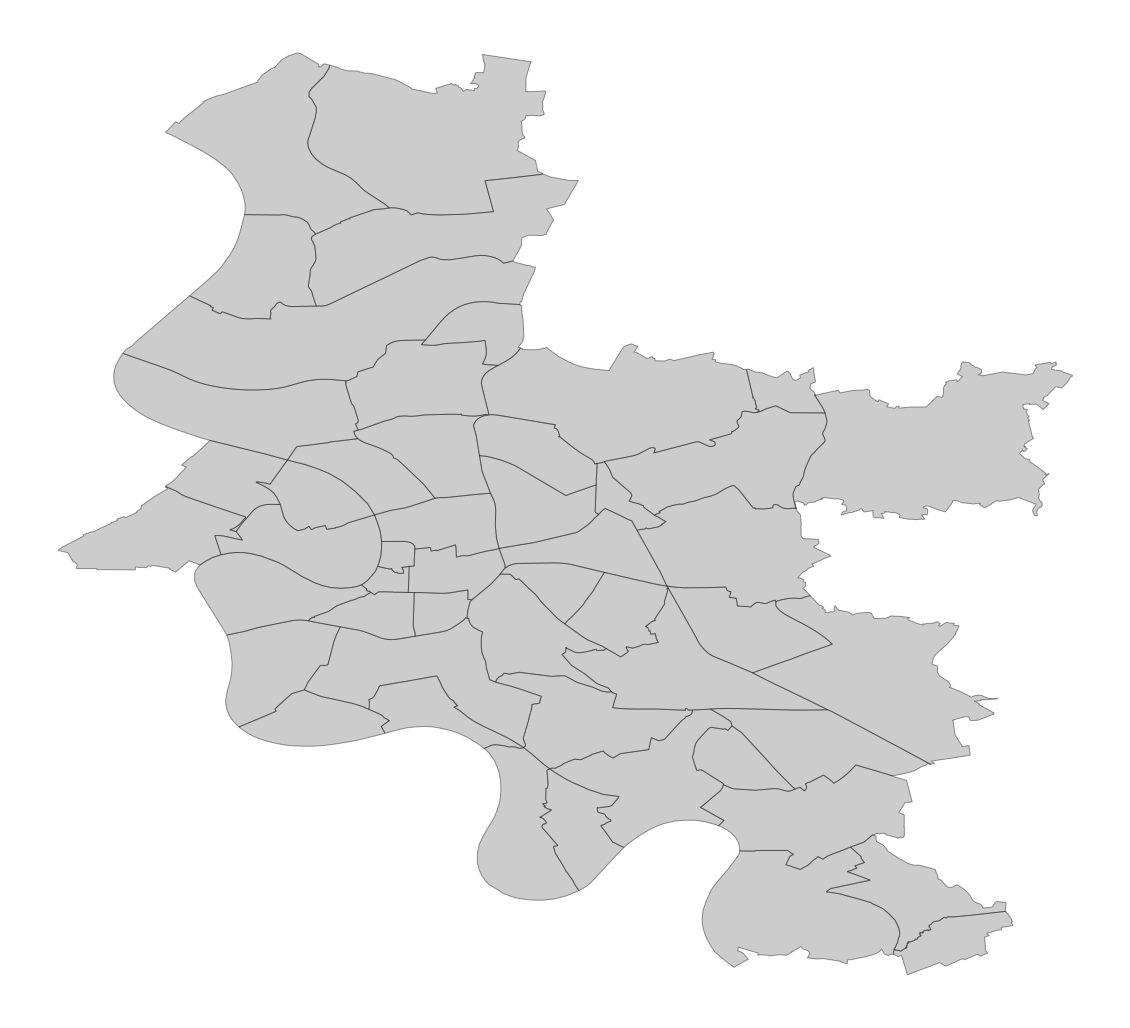

In [5]:
ax = duesseldorf.plot(color='grey', alpha=0.4, edgecolor='k', figsize=(20,20))
ax.axis('off')

## Coordinate reference systems

A **coordinate reference system (CRS)** determines how the two-dimensional (planar) coordinates of the geometry objects should be related to actual places on the (non-planar) earth.

For a nice in-depth explanation, see https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

In [6]:
duesseldorf.crs

{'init': 'epsg:4326'}

Thanks to the huge `geojson` library from [codeforamerica](https://github.com/codeforamerica/click_that_hood/tree/master/public) we can display the city of duesseldorf. Now we need to join the speeding incidents with the city.

As seen above the data was delivered within the `epsg4326` format. Let's convert that to the more common `UTM` format.

In [69]:
# convert to local UTM zone
duess = duesseldorf.to_crs(epsg=3395)

In [8]:
duess.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Garath,13,2015-06-29T11:10:40,2015-06-29T11:10:40,(POLYGON ((771292.2279905461 5673089.222510281...
1,Hubbelrath,24,2015-06-29T11:10:40,2015-06-29T11:10:40,(POLYGON ((770138.6646732152 5683990.900072466...
2,Vennhausen,47,2015-06-29T11:10:40,2015-06-29T11:10:40,"(POLYGON ((768093.7733475182 5681363.1123089, ..."
3,Carlstadt,5,2015-06-29T11:10:40,2015-06-29T11:10:40,"(POLYGON ((762810.238017583 5681126.084246287,..."
4,Niederkassel,35,2015-06-29T11:10:40,2015-06-29T11:10:40,(POLYGON ((760847.3582236929 5683849.265118471...


As we can see, nothing crucial changed except the format of the `geometry` column.  
Let's import the speeding files and check their `crs` format.

In [9]:
radar_import = geopandas.read_file('./datasets/duesseldorf/Stationäre Verkehrsüberwachung in Düsseldorf.geojson')

In [10]:
radar_import.head(2)

,Einrichtung,Name,Beschreibung,Geschwindigkeit,Planquadrat,UTM East,UTM North,geometry
0,Verkehrsüberwachung stationäre Geschwindigkeit...,A44 in Höhe Brücke Niederrheinstraße,in beiden Fahrtrichtungen,100 km/h,4282,32342802,5682310,POINT Z (6.74649227 51.27042464 0)
1,Verkehrsüberwachung stationäre Geschwindigkeit...,A46 Fleher Brücke,,,4473,32344548,5673003,POINT Z (6.77553895 51.18727691 0)


In [11]:
radar_import.crs

{'init': 'epsg:4326'}

In [12]:
radar = radar_import.to_crs(epsg=32631)

No we have insured that both (Duesseldorf and the connected radar stations) are in the same format.  

Let's take a closer look at the radar data as we can already see that some columns are empty.

In [13]:
radar.count()

Einrichtung        18
Name               18
Beschreibung       18
Geschwindigkeit    18
Planquadrat        18
UTM East           18
UTM North          18
geometry           18
dtype: int64

In [14]:
radar[radar.Geschwindigkeit == '']

,Einrichtung,Name,Beschreibung,Geschwindigkeit,Planquadrat,UTM East,UTM North,geometry
1,Verkehrsüberwachung stationäre Geschwindigkeit...,A46 Fleher Brücke,,,4473,32344548,5673003,POINT Z (763819.2655613031 5677428.521058922 0)
3,Verkehrsüberwachung Rotlichtüberwachung,Beckbuschstraße - Freiligrathplatz,,,4381,32343126,5681730,POINT Z (761697.4774139425 5686073.565491127 0)
4,Verkehrsüberwachung Rotlichtüberwachung,Brehmplatz,stadtauswärts Richtung Eisstadion,,4678,32346657,5678667,POINT Z (765441.8798751488 5683219.967886929 0)
7,Verkehrsüberwachung stationäre Geschwindigkeit...,Mörsenbroicher Ei - Grashofstraße Ecke Münster...,in Richtung Heinrich Straße,,4680,32346541,5680011,POINT Z (765234.7203146742 5684579.796484306 0)
9,Verkehrsüberwachung stationäre Geschwindigkeit...,Münchener Straße - Itter Straße,Richtung Innenstadt,,4770,32347777,5670992,POINT Z (767203.4232204983 5675686.4839657 0)
10,Verkehrsüberwachung Rotlichtüberwachung,Nordstern - Überfahrt B8 - A44,2 Anlagen stadteinwärts und Richtung Flughafen,,4382,32343053,5682342,POINT Z (761577.1476225925 5686650.618381166 0)
14,Verkehrsüberwachung Rotlichtüberwachung,Seestern - Brüsselerstraße - Lütticherstraße,,,4279,32342422,5679094,POINT Z (761293.1849310646 5683266.954820639 0)


As first step we will try to viszualize all the traffic lights and radar control stations.

(756653.051250685, 775653.9495249053, 5669640.469369138, 5697075.00049547)

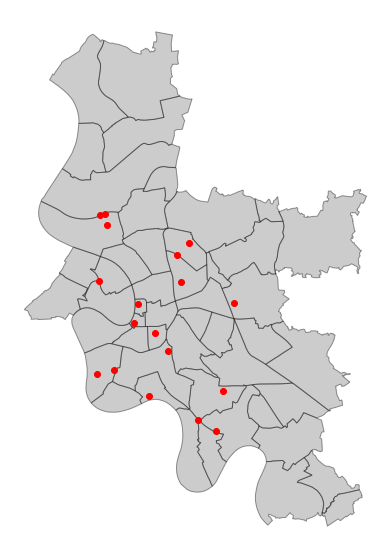

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
duess.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
radar.plot(ax=ax, color='red')
ax.axis('off')

The picture above shows the permanantent radar controll stations within the city of Duesseldorf.  
Now we want tio enrich this map with information about the bicycle traffic, the Bike + Ride stations and the ride stations.

In [68]:
#b_r = geopandas.read_file('./datasets/duesseldorf/Bike + Ride-Stationen.geojson')
b = geopandas.read_file('./datasets/duesseldorf/Radstationen_2.geojson')
c = geopandas.read_file('./datasets/duesseldorf/Zählstellen_0.geojson')

In [38]:
print(b_r.crs, b.crs, c.crs)

{'init': 'epsg:4647'} {'init': 'epsg:4326'} {'init': 'epsg:4326'}


In [39]:
b_r.head()

,NAME,ANSCHRIFT,HALTESTELLE ÖPNV,KAPAZITÄT,geometry
0,Bike+Ride Aachener Straße - Aachener Platz,Aachener Straße 40223 Düsseldorf,Aachener Platz,. Stellplätze,POINT Z (6.768617 51.195687 0)
1,Bike+Ride Am Seestern U,Am Seestern 40547 Düsseldorf,Am Seestern U,16 Stellplätze,POINT Z (6.73752 51.241592 0)
2,Bike+Ride An den Kämpen,Angermunder Straße 40489 Düsseldorf,An den Kämpen,6 Stellplätze,POINT Z (6.775968 51.326056 0)
3,Bike+Ride Angermund S,Bahnhofstraße 40489 Düsseldorf,Angermund S,210 Stellplätze,POINT Z (6.782346 51.329916 0)
4,Bike+Ride Auf der Krone,Angermunder Straße 40489 Düsseldorf,Auf der Krone,6 Stellplätze,POINT Z (6.779024 51.328519 0)


In [70]:
#bike_and_ride = b_r.to_crs(epsg=3395)
bike_station = b.to_crs(epsg=3395)
counter = c.to_crs(epsg=3395)

In [71]:
bike_and_ride.head(2)

,NAME,ANSCHRIFT,HALTESTELLE ÖPNV,KAPAZITÄT,geometry
0,Bike+Ride Aachener Straße - Aachener Platz,Aachener Straße 40223 Düsseldorf,Aachener Platz,. Stellplätze,POINT Z (1255583.755815205 738828.211942494 0)
1,Bike+Ride Am Seestern U,Am Seestern 40547 Düsseldorf,Am Seestern U,16 Stellplätze,POINT Z (1255625.973926751 739493.74073725 0)


In [73]:
bike_station.head(2)

,Name,Kategorie,Subkategorie,Straße,Hausnummer,PLZ,Telefon,Mail,Fax,Öffnungszeiten,Radverkauf,Zubehörverkauf,Wartung und Reparatur,Self-Service,Radverleih,Schlauch-O-Mat,ÖPNV Haltestelle,geometry
0,Radstation am Hauptbahnhof Düsseldorf,1. Radstation,-,Willi-Becker-Allee,8a,40227,0049 211 5 14 47 11,radstation@zwd.de,0049 211 5 14 47 69,1. März - 31. Oktober (Sommersaison):\r\nMo - ...,j,j,j,j,j,j,Düsseldorf Hbf,POINT (756430.0775156247 6626789.453504083)
1,Radstation am Hauptbahnhof Düsseldorf,2. Verleih,2.1 Radstation,Willi-Becker-Allee,8a,40227,0049 211 5 14 47 11,radstation@zwd.de,0049 211 5 14 47 69,1. März - 31. Oktober (Sommersaison):\r\nMo - ...,j,j,j,j,j,j,Düsseldorf Hbf,POINT (756430.0775156247 6626789.453504083)


In [74]:
counter.head(2)

,Standort,Installiert,Kommentar,geometry
0,Bilker Allee Fahrtrichtung Innenstadt,10.12.2013,1 Schleifenpaar in Asphalt geschnitten,POINT (753778.7812034013 6625330.027113835)
1,Bilker Allee Rahrtrichtung StadtauswÃ¤rts,10.12.2013,1 Schleifenpaar in Asphalt geschnitten,POINT (753801.04510156 6625330.027113835)


Show all bike stations, bike and ride stations and the bicycle counter on one map.

In [75]:
s = geopandas.read_file('./datasets/duesseldorf/Stationäre Verkehrsüberwachung in Düsseldorf.geojson')

In [76]:
stat = s.to_crs(epsg=3395)

(743183.4198995702, 773942.6093383682, 6608014.7463021, 6652521.5732884165)

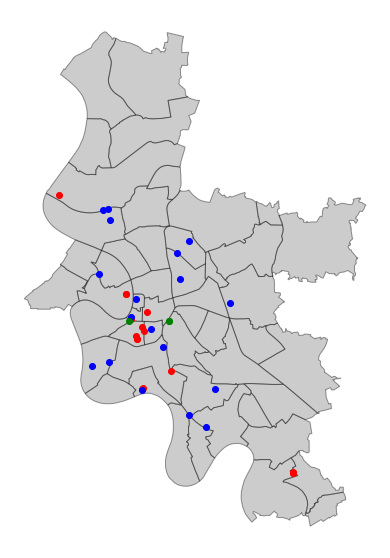

In [77]:
fig, ax = plt.subplots(figsize=(20, 10))
duess.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
counter.plot(ax=ax, color='red')
stat.plot(ax=ax, color='blue')
bike_station.plot(ax=ax, color='green')
#bike_and_ride.plot(ax=ax, color='pink')
ax.axis('off')

In [116]:
import folium
from folium import plugins
from folium.plugins import HeatMap

import seaborn as sns

In [86]:
m = folium.Map([51.218227, 6.778400], zoom_start=11, tiles = "Stamen Toner")
m

To use `folium` properly we need to transform the `geojson` files into a matrix which contains the specific longitude and latitude values.

In [83]:
count = counter.to_crs({'init': 'epsg:4326'})
count.head(2)

,Standort,Installiert,Kommentar,geometry
0,Bilker Allee Fahrtrichtung Innenstadt,10.12.2013,1 Schleifenpaar in Asphalt geschnitten,POINT (6.77131 51.21073999999088)
1,Bilker Allee Rahrtrichtung StadtauswÃ¤rts,10.12.2013,1 Schleifenpaar in Asphalt geschnitten,POINT (6.77151 51.21073999999088)


In [131]:
frequency = pd.read_csv('./datasets/duesseldorf/frequency.csv', delimiter=';')

In [135]:
frequency.head(1)
#test = frequency.copy()

,Datum,Uhrzeit,Bilker Allee IN,Bilker Allee OUT,Christophstraße,Elisabethstraße,Fleher Deich Ost stromaufwärts,Fleher Deich west stromabwärts,Friedrichstraße,Kirchfeldstraße,Koblenzer einwärts nach TLS,Koblenzer einwärts vor TLS,Koblenzer stadtauswärts,KÖ Steinstraße,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Süd,zeitpunkt
0,01.01.2018,00:00,0,0,0.0,0,0,0,0,1.0,0,0,0.0,1,0,2,0.0,0,NaT


In [136]:
frequency['zeitpunkt'] = pd.to_datetime(frequency['Datum'] + ' ' + frequency['Uhrzeit'])

In [138]:
frequency.set_index(['zeitpunkt'], drop=True).head(2)

,Datum,Uhrzeit,Bilker Allee IN,Bilker Allee OUT,Christophstraße,Elisabethstraße,Fleher Deich Ost stromaufwärts,Fleher Deich west stromabwärts,Friedrichstraße,Kirchfeldstraße,Koblenzer einwärts nach TLS,Koblenzer einwärts vor TLS,Koblenzer stadtauswärts,KÖ Steinstraße,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Süd
zeitpunkt,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,01.01.2018,00:00,0,0,0.0,0,0,0,0,1.0,0,0,0.0,1,0,2,0.0,0
2018-01-01 00:15:00,01.01.2018,00:15,0,1,0.0,1,0,0,3,4.0,0,0,0.0,0,0,0,0.0,0


In [159]:
frequency_grouped = frequency.groupby(frequency.Datum)
frequency_grouped.get_group('01.01.2018').head(2)
frequency_grouped.get_group('01.01.2018').Elisabethstraße.sum()

65

In [175]:
frequency.columns

Index(['Datum', 'Uhrzeit', 'Bilker Allee IN', 'Bilker Allee OUT',
       'Christophstraße', 'Elisabethstraße', 'Fleher Deich Ost stromaufwärts',
       'Fleher Deich west stromabwärts', 'Friedrichstraße', 'Kirchfeldstraße',
       'Koblenzer einwärts nach TLS', 'Koblenzer einwärts vor TLS',
       'Koblenzer stadtauswärts', 'KÖ Steinstraße', 'Lohauser Deich',
       'Mannesmann Ufer', 'OKB Nord', 'OKB Süd', 'zeitpunkt'],
      dtype='object')

In [181]:
frequency = frequency.rename(columns={"Bilker Allee IN": "Bilker_In",
                          "Bilker Allee OUT": "Bilker_Out",
                         "Fleher Deich west stromabwärts": "Deich_ab",
                         "Fleher Deich Ost stromaufwärts" : "Deich_auf",
                         "Koblenzer einwärts nach TLS" : "Koblenz_nach_TLS",
                         "Koblenzer einwärts vor TLS" : "Koblenz_vor_TLS",
                         "Koblenzer stadtauswärts" : "Koblenz_aus",
                         "KÖ Steinstraße" : "Koe",
                         "Lohauser Deich" : "Lohn_Deich",
                         "Mannesmann Ufer" : "Mannesmann_Ufer",
                         "OKB Nord" : "OKB_Nord",
                         "OKB Süd" : "OKB_Süd",
                         })
frequency.columns

Index(['Datum', 'Uhrzeit', 'Bilker_In', 'Bilker_Out', 'Christophstraße',
       'Elisabethstraße', 'Deich_auf', 'Deich_ab', 'Friedrichstraße',
       'Kirchfeldstraße', 'Koblenz_nach_TLS', 'Koblenz_vor_TLS', 'Koblenz_aus',
       'Koe', 'Lohn_Deich', 'Mannesmann_Ufer', 'OKB_Nord', 'OKB_Süd',
       'zeitpunkt'],
      dtype='object')

In [183]:
frequency_grouped = frequency.groupby(frequency.Datum)
frequency_grouped.get_group('01.01.2018').head(1)

,Datum,Uhrzeit,Bilker_In,Bilker_Out,Christophstraße,Elisabethstraße,Deich_auf,Deich_ab,Friedrichstraße,Kirchfeldstraße,Koblenz_nach_TLS,Koblenz_vor_TLS,Koblenz_aus,Koe,Lohn_Deich,Mannesmann_Ufer,OKB_Nord,OKB_Süd,zeitpunkt
0,01.01.2018,00:00,0,0,0.0,0,0,0,0,1.0,0,0,0.0,1,0,2,0.0,0,2018-01-01


In [184]:
bilker_in = []
bilker_out = []
chris= []
elisa = []
fleh_deich_ost = []
fleh_deich_west = []
friedrich = []
kirch = []
koblenz_nach_tls = []
koblenz_vor_tls = []
koblenz_auswaerts = []
koe = [] 
lohauser = []
mannesmann = []
okb_n = []
okb_s = []

for date, group in frequency_grouped: 
    lohauser.append(group.Lohn_Deich.sum())
    mannesmann.append(group.Mannesmann_Ufer.sum())
    okb_n.append(group.OKB_Nord.sum())
    okb_s.append(group.OKB_Süd.sum())
    koblenz_nach_tls.append(group.Koblenz_nach_TLS.sum())
    koblenz_vor_tls.append(group.Koblenz_vor_TLS.sum())
    koblenz_auswaerts.append(group.Koblenz_aus.sum())
    koe.append(group.Koe.sum())
    fleh_deich_ost.append(group.Deich_auf.sum())
    fleh_deich_west.append(group.Deich_ab.sum())
    friedrich.append(group.Friedrichstraße.sum())
    kirch.append(group.Kirchfeldstraße.sum())
    bilker_in.append(group.Bilker_In.sum())
    bilker_out.append(group.Bilker_Out.sum())
    elisa.append(group.Elisabethstraße.sum())
    chris.append(group.Christophstraße.sum())

In [ ]:
for index, row in divvyStations.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)